In [9]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("thermal-dataset.csv")
data.head()

,Name,V,M,n,np,B,G,E,v,H,...,vL,vS,va,_e,_el,_es,_e.1,A,y-theory,y-exp
0,66_C,11.41,24.022,2,2,431.7450,518.2490,1110.438653,0.071337,95.902307,...,17.920671,12.175399,13.276809,1755.800206,0.944704,0.775599,0.835777,7.830000e-07,547.103092,5200.0
1,20012_InSb,73.73,236.570,2,2,36.8242,14.5179,38.494849,0.325772,3.219550,...,3.247239,1.650707,1.849941,131.346902,0.842791,-0.939877,0.908668,9.570000e-07,4.344094,36.5
2,1190_ZnSe,47.34,144.350,2,2,56.3189,29.0179,74.293904,0.280139,6.603032,...,4.331764,2.393947,2.667364,219.524413,0.978193,0.049397,0.566198,3.080000e-07,8.835527,52.0
3,682_NaF,24.74,41.988,2,2,52.4118,36.3275,88.528881,0.218483,10.653966,...,5.982017,3.590300,3.971626,405.799721,1.325488,1.131115,1.199411,1.860000e-06,17.655636,34.9
4,16220_Si,40.97,56.170,2,2,90.0009,63.4097,154.050571,0.214724,15.043345,...,8.756144,5.277574,5.835682,503.979531,0.952194,0.320702,0.608926,3.660000e-07,40.815752,312.0


In [3]:
data2 = data.drop(labels=["Name","y-theory","y-exp"],axis=1)
data2.head()

,V,M,n,np,B,G,E,v,H,B',G',_,vL,vS,va,_e,_el,_es,_e.1,A
0,11.41,24.022,2,2,431.7450,518.2490,1110.438653,0.071337,95.902307,-104.58900,-85.59650,3.496005,17.920671,12.175399,13.276809,1755.800206,0.944704,0.775599,0.835777,7.830000e-07
1,73.73,236.570,2,2,36.8242,14.5179,38.494849,0.325772,3.219550,-1.94439,0.30450,5.327997,3.247239,1.650707,1.849941,131.346902,0.842791,-0.939877,0.908668,9.570000e-07
2,47.34,144.350,2,2,56.3189,29.0179,74.293904,0.280139,6.603032,-4.24220,-0.26488,5.063340,4.331764,2.393947,2.667364,219.524413,0.978193,0.049397,0.566198,3.080000e-07
3,24.74,41.988,2,2,52.4118,36.3275,88.528881,0.218483,10.653966,-7.08337,-3.81125,2.818214,5.982017,3.590300,3.971626,405.799721,1.325488,1.131115,1.199411,1.860000e-06
4,40.97,56.170,2,2,90.0009,63.4097,154.050571,0.214724,15.043345,-7.52203,-1.50861,2.276601,8.756144,5.277574,5.835682,503.979531,0.952194,0.320702,0.608926,3.660000e-07


In [4]:
mms = MinMaxScaler()
mms.fit(data2)
data_transformed = mms.transform(data2)
pd.DataFrame(data_transformed).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.003103,0.0,0.0,0.994323,0.989296,0.990758,0.143154,0.904016,0.000000,0.000000,0.185004,0.994018,0.993371,0.993499,1.000000,0.137017,0.587751,0.007917,0.000038
1,0.063360,0.044292,0.0,0.0,0.067846,0.026959,0.033298,0.658476,0.030292,0.764115,0.697857,0.311875,0.102546,0.110663,0.113297,0.060946,0.135266,0.572532,0.009288,0.000049
2,0.036529,0.026421,0.0,0.0,0.113580,0.054660,0.065274,0.566053,0.062189,0.747009,0.693232,0.293547,0.168436,0.172999,0.176262,0.111919,0.137593,0.581308,0.002845,0.000010
3,0.013552,0.006585,0.0,0.0,0.104414,0.068624,0.077989,0.441177,0.100377,0.725859,0.664421,0.138064,0.268695,0.273337,0.276729,0.219600,0.143560,0.590905,0.014758,0.000103
4,0.030053,0.009333,0.0,0.0,0.192598,0.120362,0.136513,0.433564,0.141756,0.722593,0.683128,0.100556,0.437235,0.414849,0.420315,0.276355,0.137146,0.583715,0.003649,0.000013


In [5]:
km = KMeans(n_clusters=10)
km = km.fit(data_transformed)
km.inertia_ #Sum of squared distances of samples to their closest cluster center
km.cluster_centers_
km.labels_

array([1, 6, 4, 4, 9, 2, 0, 7, 7, 7, 7, 9, 1, 9, 0, 1, 1, 1, 4, 1, 7, 1,
       1, 3, 7, 7, 1, 1, 2, 7, 7, 7, 4, 4, 2, 4, 9, 0, 3, 7, 3, 9, 2, 4,
       8, 0, 3, 3, 2, 8, 2, 2, 4, 9, 0, 2, 2, 6, 3, 2, 9, 6, 2, 2, 0, 3,
       3, 2, 2, 3, 3, 2, 2, 6, 2, 8, 9, 0, 0, 9, 4, 9, 3, 9, 2, 3, 3, 2,
       2, 3, 9, 2, 3, 3, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 4, 2, 3, 3, 0,
       4, 3, 3, 2, 0, 8, 3, 0, 2, 2, 6, 4, 3, 2, 4, 2, 3, 3, 3, 9, 3, 2,
       8, 3, 2, 2, 3, 6, 4, 4, 2, 3, 2, 3, 2, 9, 2, 4, 3, 3, 2, 2, 0, 3,
       0, 2, 2, 3, 2, 0, 3, 8, 3, 8, 0, 3, 4, 2, 2, 2, 3, 2, 3, 4, 3, 4,
       3, 6, 3, 2, 2, 3, 2, 2, 4, 2, 2, 0, 0, 8, 2, 2, 9, 3, 0, 0, 6, 2,
       2, 3, 0, 4, 4, 3, 4, 7, 8, 9, 4, 3, 0, 8, 8, 3, 8, 8, 3, 3, 3, 4,
       3, 8, 3, 4, 4, 8, 3, 3, 6, 0, 4, 4, 2, 3, 6, 6, 6, 2, 6, 8, 8, 9,
       4, 4, 0, 6, 8, 6, 6, 0, 9, 4, 8, 8, 2, 4, 4, 6, 8, 4, 0, 0, 9, 8,
       6, 4, 8, 4, 6, 6, 8, 6, 6, 2, 6, 9, 4, 4, 8, 2, 6, 2, 2, 8, 9, 0,
       9, 4, 8, 4, 4, 6, 4, 6, 9, 6, 6, 8, 4, 2, 8,

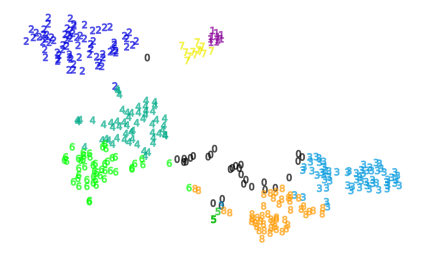

In [14]:
#from plot_digits_linkage import plot_clustering 
from sklearn.cluster import AgglomerativeClustering
from sklearn import manifold
from time import time
from sklearn.manifold import TSNE
X=data_transformed
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='random').fit_transform(X)


#X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(data_transformed)

#for linkage in ("ward", "average", "complete", "single"):
#    clustering = AgglomerativeClustering(linkage=linkage, n_clusters=10)
#    t0 = time()
#    clustering.fit(X_red)
#    print("%s :\t%.2fs" % (linkage, time() - t0))

plot_clustering(X_embedded, km.labels_)

In [15]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for digit in range(9):
        plt.scatter(
            *X_red[km.labels_ == digit].T,
            marker=f"${digit}$",
            s=50,
            c=plt.cm.nipy_spectral(labels[km.labels_ == digit] / 10),
            alpha=0.5,
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])